In [2]:
#import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [3]:
#Load the dataset
dataset = pd.read_csv('spambase.data')

In [4]:
#before removing duplicates
dataset.shape

(4600, 58)

In [5]:
#data cleaning
# Remove duplicate rows
dataset.drop_duplicates(inplace=True)

In [6]:
#after removing duplicates
dataset.shape

(4209, 58)

In [7]:
# Remove missing values
dataset.dropna(inplace=True)

In [8]:
#after removing missing values
dataset.shape

(4209, 58)

In [9]:
#check data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4209 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4209 non-null   float64
 1   0.64    4209 non-null   float64
 2   0.64.1  4209 non-null   float64
 3   0.1     4209 non-null   float64
 4   0.32    4209 non-null   float64
 5   0.2     4209 non-null   float64
 6   0.3     4209 non-null   float64
 7   0.4     4209 non-null   float64
 8   0.5     4209 non-null   float64
 9   0.6     4209 non-null   float64
 10  0.7     4209 non-null   float64
 11  0.64.2  4209 non-null   float64
 12  0.8     4209 non-null   float64
 13  0.9     4209 non-null   float64
 14  0.10    4209 non-null   float64
 15  0.32.1  4209 non-null   float64
 16  0.11    4209 non-null   float64
 17  1.29    4209 non-null   float64
 18  1.93    4209 non-null   float64
 19  0.12    4209 non-null   float64
 20  0.96    4209 non-null   float64
 21  0.13    4209 non-null   float64
 22  

In [10]:
# Save cleaned dataset
dataset.to_csv('cleaned_dataset.csv', index=False)

In [11]:
# print first five data points 
dataset.head()


,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [12]:
#print last five data points
dataset.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [13]:
print(dataset.shape)

(4209, 58)


In [14]:
#dataset['57'].value_count()
dataset.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,...,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508,0.398670
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,...,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831,0.489683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.00000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706000,44.000000,273.00000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.00000,1.000000


In [15]:
#separate index location for X (:-all rows)
x=dataset.iloc[:,0:57]
x.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54


In [16]:
#separate index location for Y (:-all rows)
y=dataset.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: 1, dtype: int64

In [17]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
x=scaler.fit_transform(x)
x[0:5]

array([[ 3.52030682e-01,  3.68723902e-01,  4.04525775e-01,
        -4.66499100e-02, -2.69439563e-01,  6.64145010e-01,
         2.32826054e-01, -9.26824327e-02, -3.25659622e-01,
         1.05314009e+00,  8.32408230e-01,  2.54742619e-01,
         1.78568086e+00,  4.29902786e-01,  3.93032219e-01,
        -1.42706498e-01, -1.73030774e-01,  1.69184472e-01,
         9.90346442e-01, -1.68088139e-01,  6.78640440e-01,
        -1.22863174e-01,  9.37440590e-01,  7.85252199e-01,
        -3.42455326e-01, -3.08540545e-01, -2.08371511e-01,
        -2.40192753e-01, -1.70608095e-01, -2.36150798e-01,
        -1.64122373e-01, -1.49386289e-01, -1.79843671e-01,
        -1.51709366e-01, -2.03497956e-01, -2.57180362e-01,
        -1.73182266e-01, -6.15733762e-02, -1.87676280e-01,
        -1.91827641e-01, -1.30248924e-01, -1.78351105e-01,
        -2.10391774e-01, -1.32002786e-01, -3.06146600e-01,
        -2.04050036e-01, -7.31030494e-02, -1.16421100e-01,
        -1.60029911e-01, -4.40567113e-02, -1.64384139e-0

In [19]:
print(dataset.shape)

(4209, 58)


In [20]:
#Index location for X
X=dataset.iloc[:,0:57]
X.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54


In [21]:
#Index location for Y
Y=dataset.iloc[:,-1]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: 1, dtype: int64

In [22]:
#split into 2 parts for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [23]:
X_train.shape

(3367, 57)

In [24]:
X_test.shape

(842, 57)

In [25]:
#train the model using Decision Tree algorithm

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [26]:
#Predicted values

Pred = model.predict(X_test)
Pred[0:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [27]:
#compare with dataset

Y_test[0:5]

1292    1
395     1
3431    0
2861    0
4523    0
Name: 1, dtype: int64

In [28]:
#accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix
import seabron as sns
accuracy_score(Y_test,Pred)
confusionMatrix = confusion_matrix(Y_test,Pred)


ModuleNotFoundError: No module named 'seabron'

In [30]:
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test, Pred)
Precision = metrics.precision_score(Y_test, Pred)
Sensitivity_recall = metrics.recall_score(Y_test, Pred)
Specificity = metrics.recall_score(Y_test, Pred)
F1_score = metrics.f1_score(Y_test, Pred)

In [31]:
print({"Accuracy":accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})


{'Accuracy': 0.9014251781472684, 'Precision': 0.878419452887538, 'Sensitivity_recall': 0.8704819277108434, 'Specificity': 0.8704819277108434, 'F1_score': 0.8744326777609683}


In [ ]:
from sklearn.tree import DecisionTreeClassifier

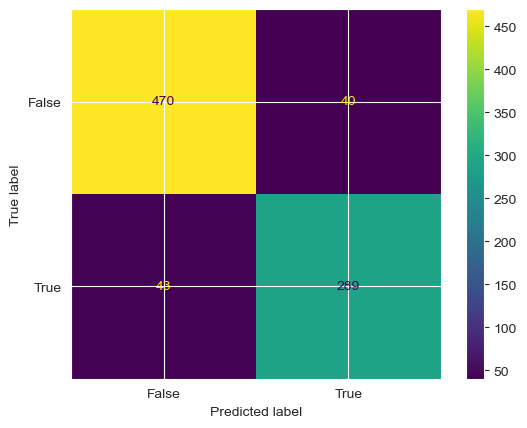

In [32]:
confusion_matrix = metrics.confusion_matrix(Y_test, Pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [35]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

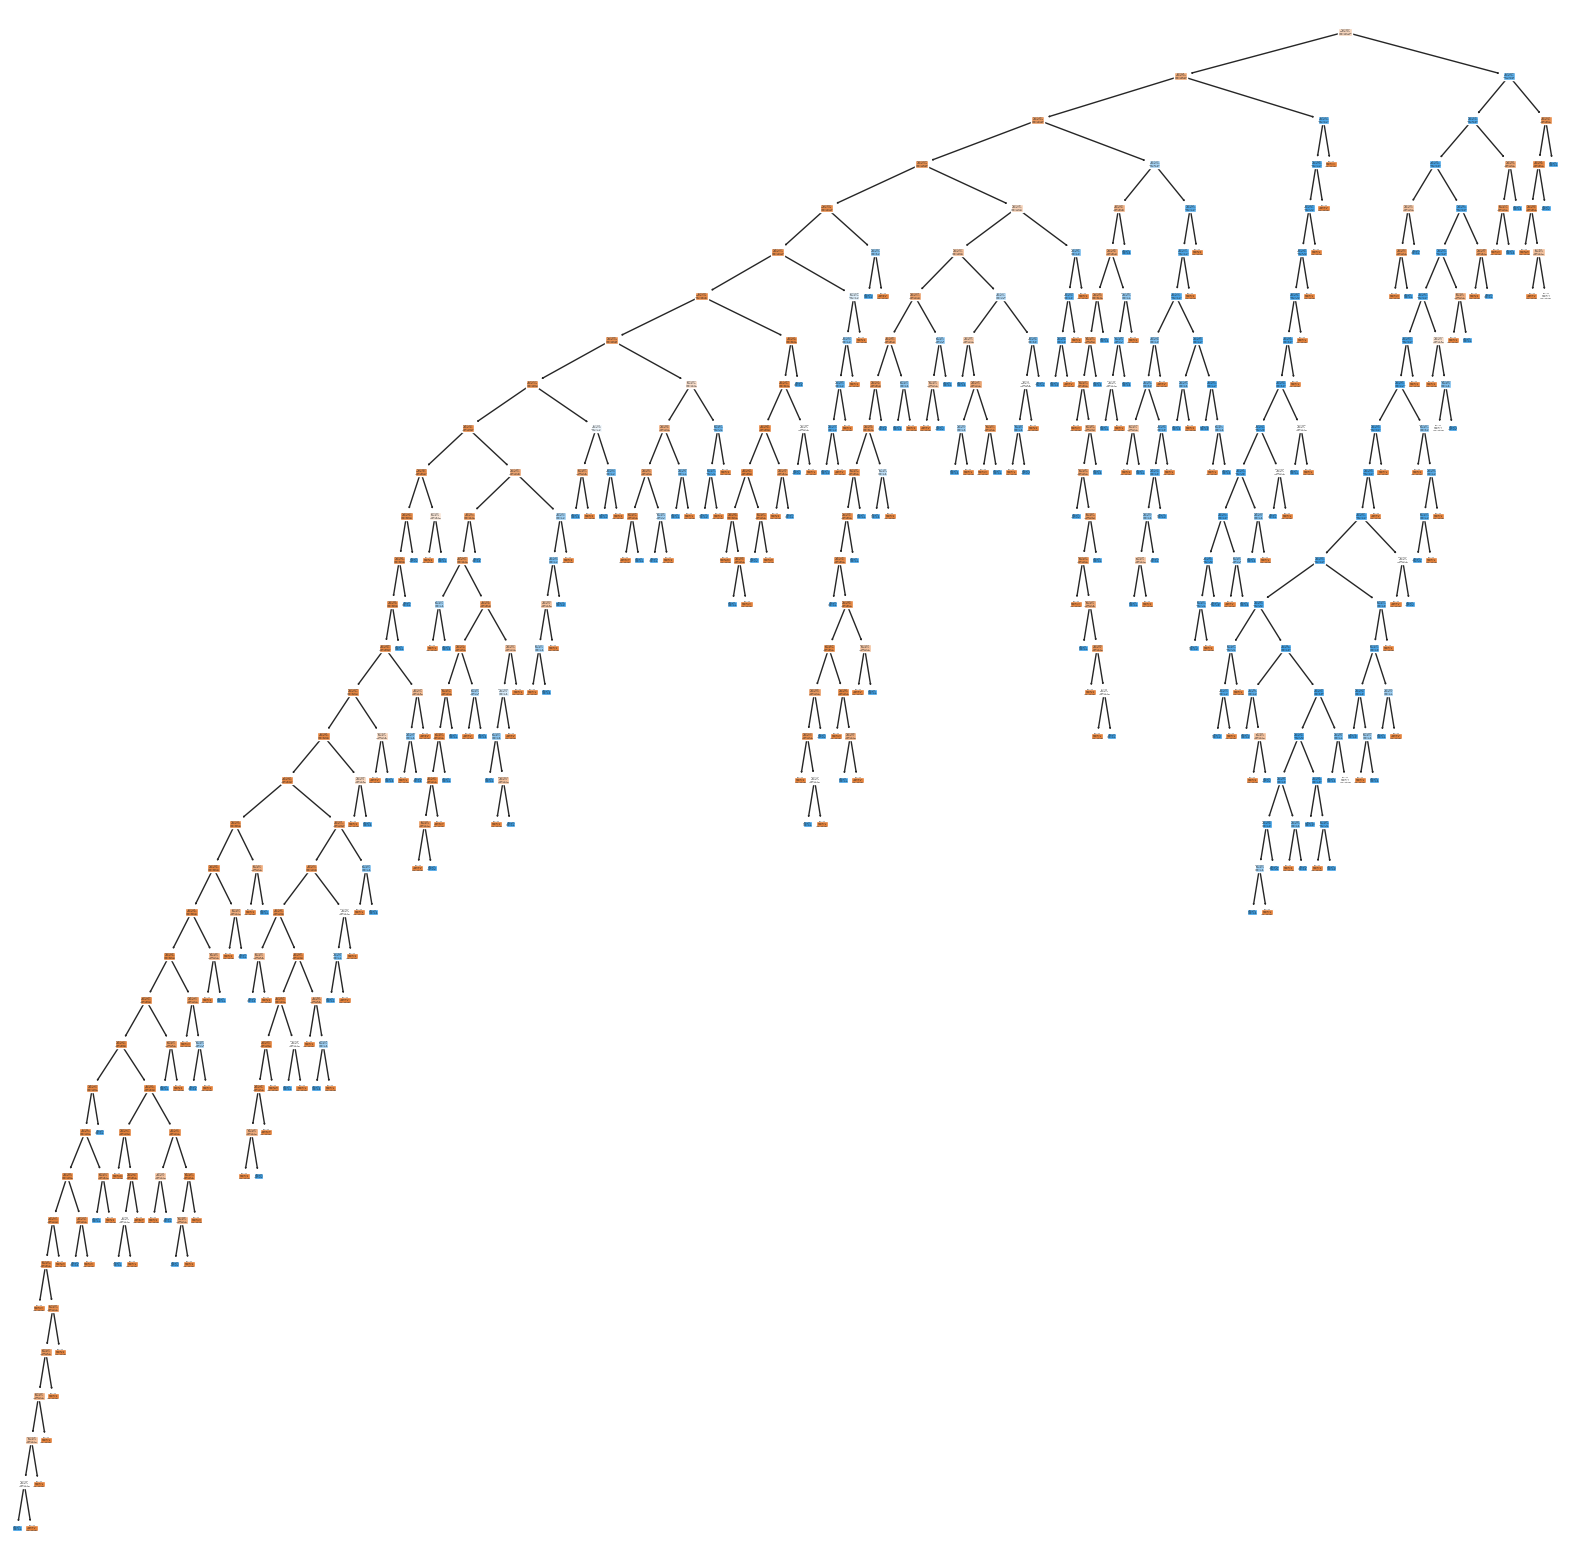

In [37]:
plt.figure(figsize=(20,20))
features = dataset.columns
classes = ['Not spam','spam']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

Text(0, 0.5, 'True Positive')

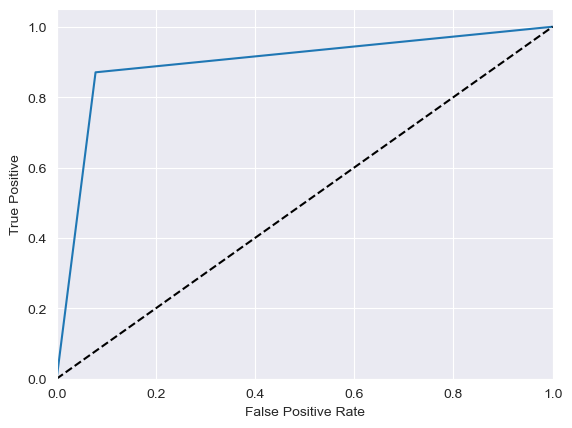

In [38]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# get false +ve and true + rate for different threshold vales
fpr,tpr,thresholds = roc_curve(Y_test,Pred)
#auc= area under the curve
roc_auc=auc (fpr,tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive')